In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
os.chdir('../')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.download_data import download_imagenet, download_random_imagenet_classes
import pickle
from src.dataset import *
from src.concept_vectors import *
from src.util import *
import random
from src.plots import *
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine 
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from src.hierarchy import *

In [5]:
X, y = make_blobs(n_samples=50, centers=2, n_features=2,random_state=3)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})

Text(0, 0.5, '$x_2$')

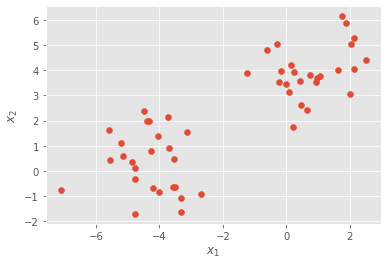

In [6]:
plt.scatter(X[:, 0], X[:, 1], label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [10]:
df

,X1,X2
1,-3.336072,-1.644337
0,0.092166,3.139081
1,-5.552574,0.455115
0,-0.297907,5.047579
0,0.419308,3.574362
1,-3.307619,-1.076985
0,0.212192,1.743873
0,0.659687,2.419815
0,-0.607327,4.809632
1,-4.856633,0.367169


In [30]:
analyzed_attributes = ["{}_color".format(i) for i in range(4)]
analyzed_attributes += ["{}_number".format(i) for i in range(4)]
analyzed_attributes += ["spurious"]

In [28]:
concept_vectors_cbm = []
concept_metadata_cbm = []

In [31]:
for attribute in analyzed_attributes: 
    cbm_vector = create_vector_from_label_mnist(attribute)
    concept_vectors_cbm += list(cbm_vector)
    concept_metadata_cbm+=[{'concept': attribute}]
concept_vectors_cbm = np.array(concept_vectors_cbm)

In [32]:
label_by_concept_cbm = [i['concept'] for i in concept_metadata_cbm]

In [33]:
tree_info = create_linkage_hierarchy(concept_vectors_cbm)

<IPython.core.display.Javascript object>


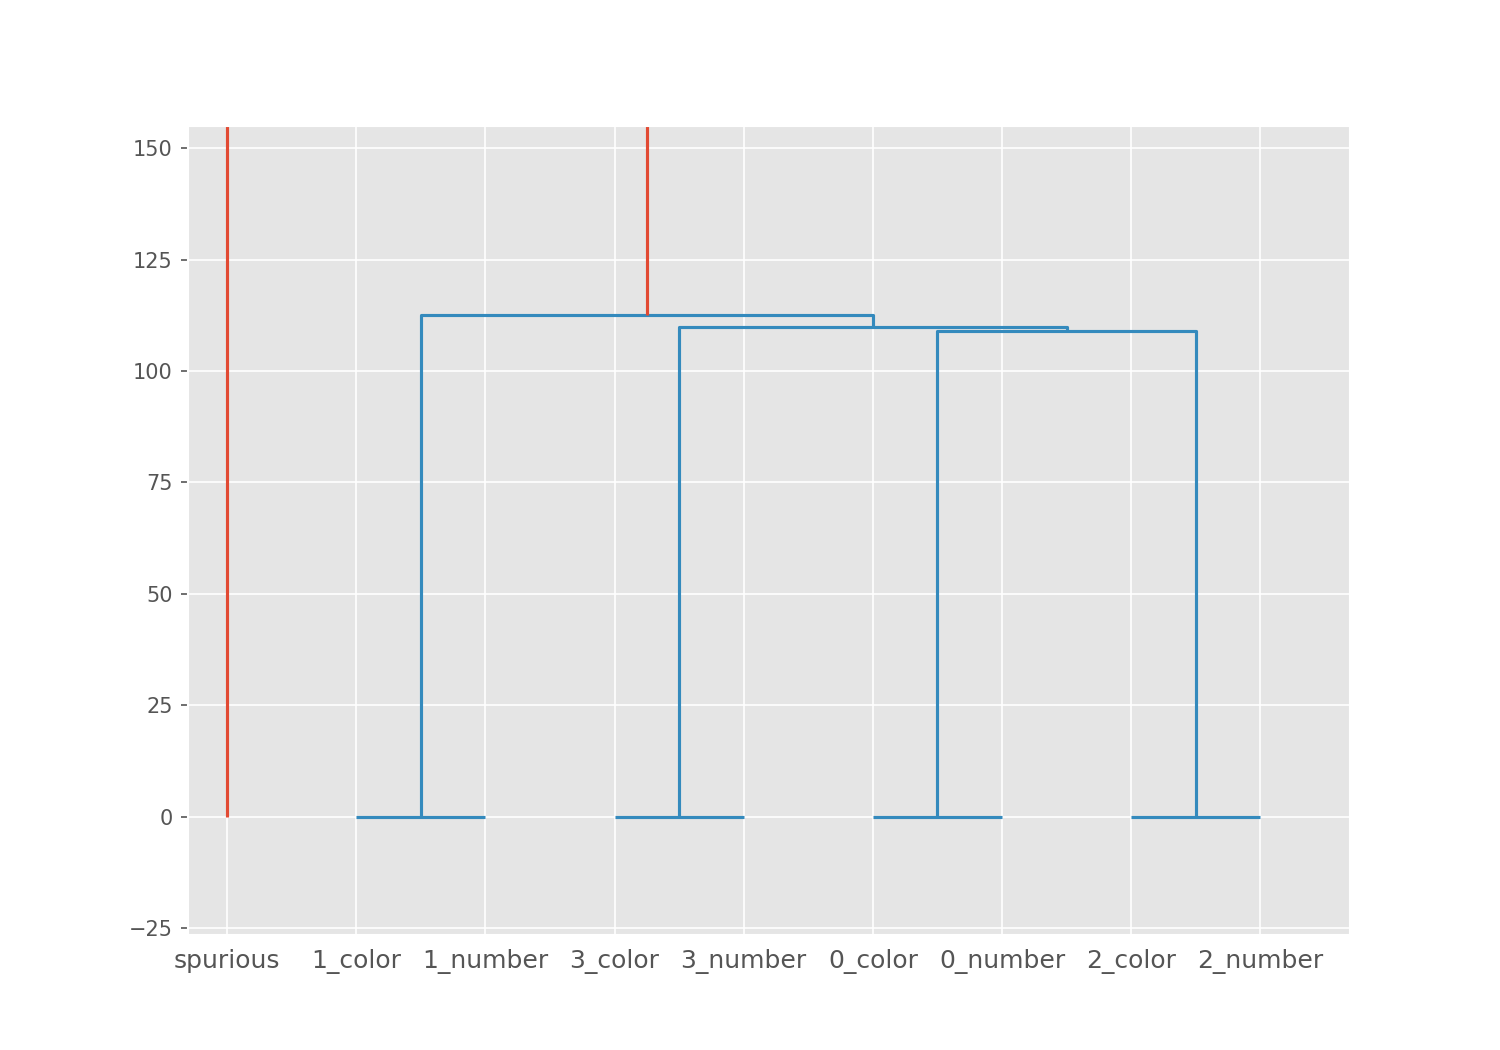

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [40.0, 40.0, 70.0, 70.0],
  [20.0, 20.0, 55.0, 55.0],
  [5.0, 5.0, 37.5, 37.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 109.0, 109.0, 0.0],
  [0.0, 109.79070998950685, 109.79070998950685, 109.0],
  [0.0, 112.53888216967503, 112.53888216967503, 109.79070998950685],
  [0.0, 172.87857010051883, 172.87857010051883, 112.53888216967503]],
 'ivl': ['spurious',
  '1_color',
  '1_number',
  '3_color',
  '3_number',
  '0_color',
  '0_number',
  '2_color',
  '2_number'],
 'leaves': [8, 1, 5, 3, 7, 0, 4, 2, 6],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']}

In [34]:
plot_dendogram(tree_info,label_by_concept_cbm)

<IPython.core.display.Javascript object>


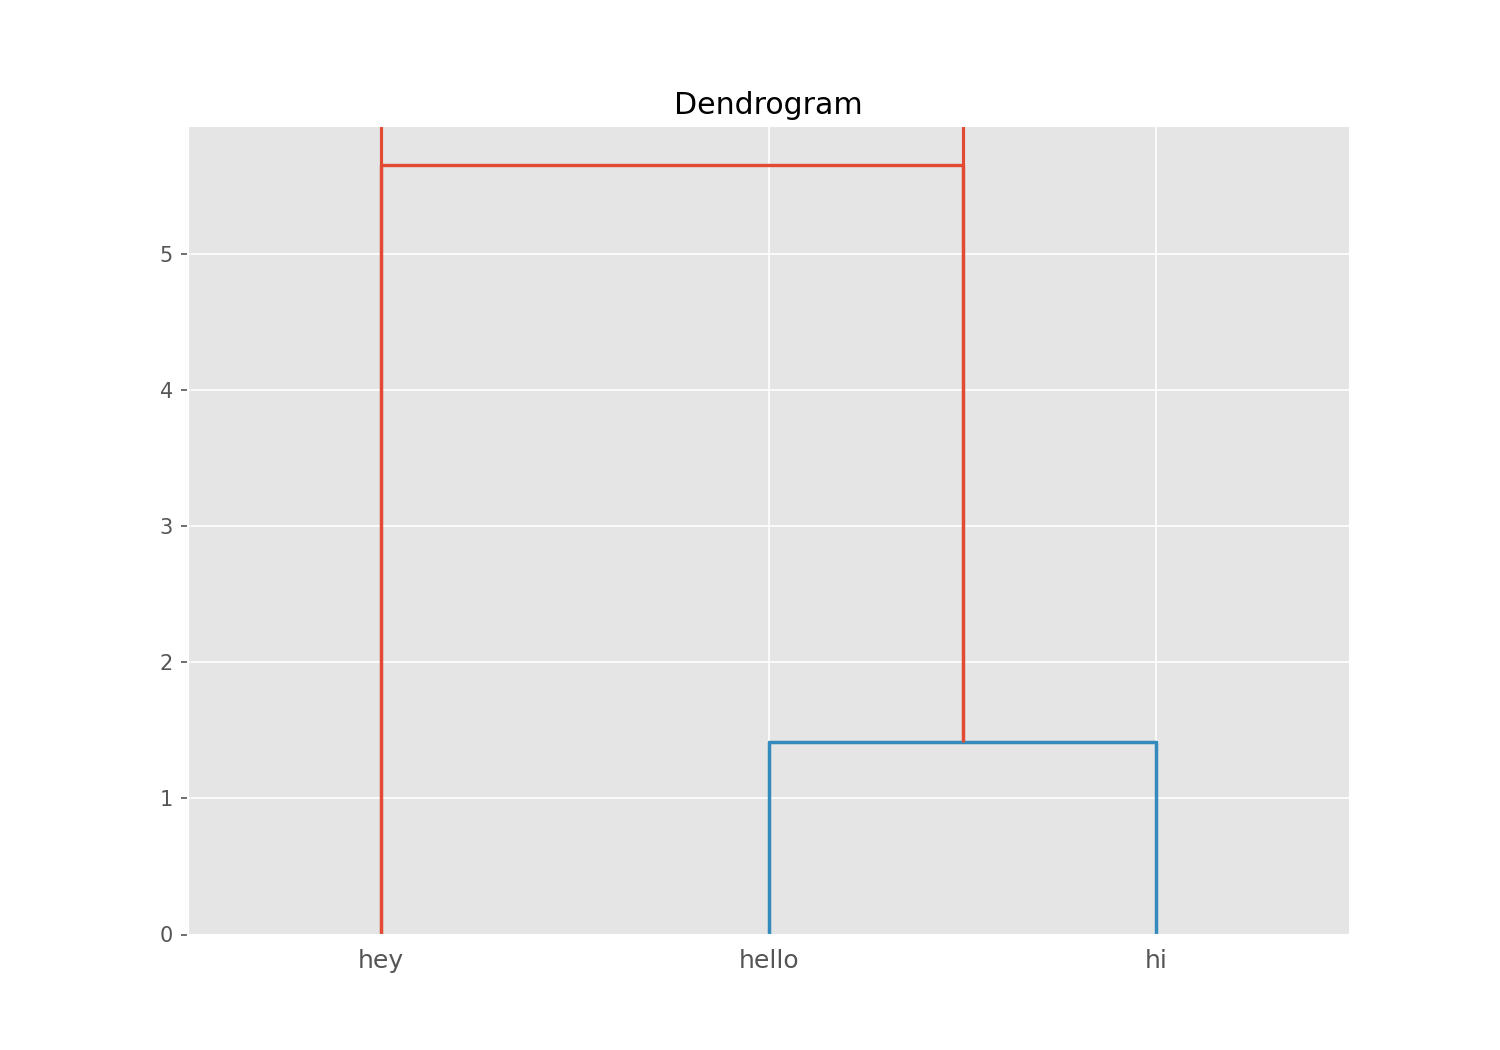

In [13]:
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(X, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method,labels=["hello","hi","hey"])

In [14]:
linkage_method

array([[0.        , 1.        , 1.41421356, 2.        ],
       [2.        , 3.        , 7.34846923, 3.        ]])